# Исследование данных о продажах компьютерных игр в 2016 году

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** 

Определить факторы, влияющие на успешность продаж игр для планирования рекламной кампании на 2017 год.

**Задачи исследования:**

1. Изучить данные
2. Выявить возможные факторы влияния на продажи игр
3. Подтвердить или опровергнуть зависимость продаж от предложенных факторов
4. Предложить рекомендации для проведения рекламной кампании 

**Ход исследования:**
- Обзор данных
- Предобработка данных 
- Проведение дополнительных расчетов и добавление их в таблицу для анализа
- Проведение исследования данных по годам
- Проведение исследования данных по платформам
- Проведение исследования данных по жанрам
- Составление "портрета" пользователя по регионам (исследование платформ и жанров и рейтинга ESRB)
- Проверка статистических гипотез
- Написание общего вывода с рекомендациями

## Изучение общей информации о данных 

In [1]:
# импорт библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
# чтение файла 
data = pd.read_csv('///')
#вывод первых 10 строк 
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


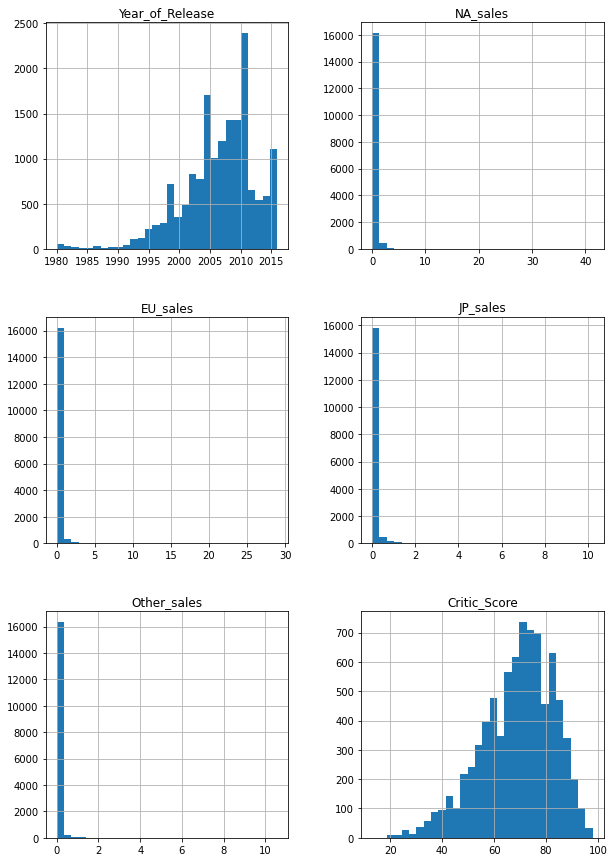

In [4]:
#вывод првых гистогарамм для оценки разброса данных 
data.hist(figsize=(10,15), bins=30);

In [5]:
# посмотрим на столбцы, которые не попали на графики 
# посмотрим на уникальные значения и их количество столбца с оценками пользователей
data['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
0.7       2
0.3       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [6]:
# посмотрим на количество значений по рейтингам
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

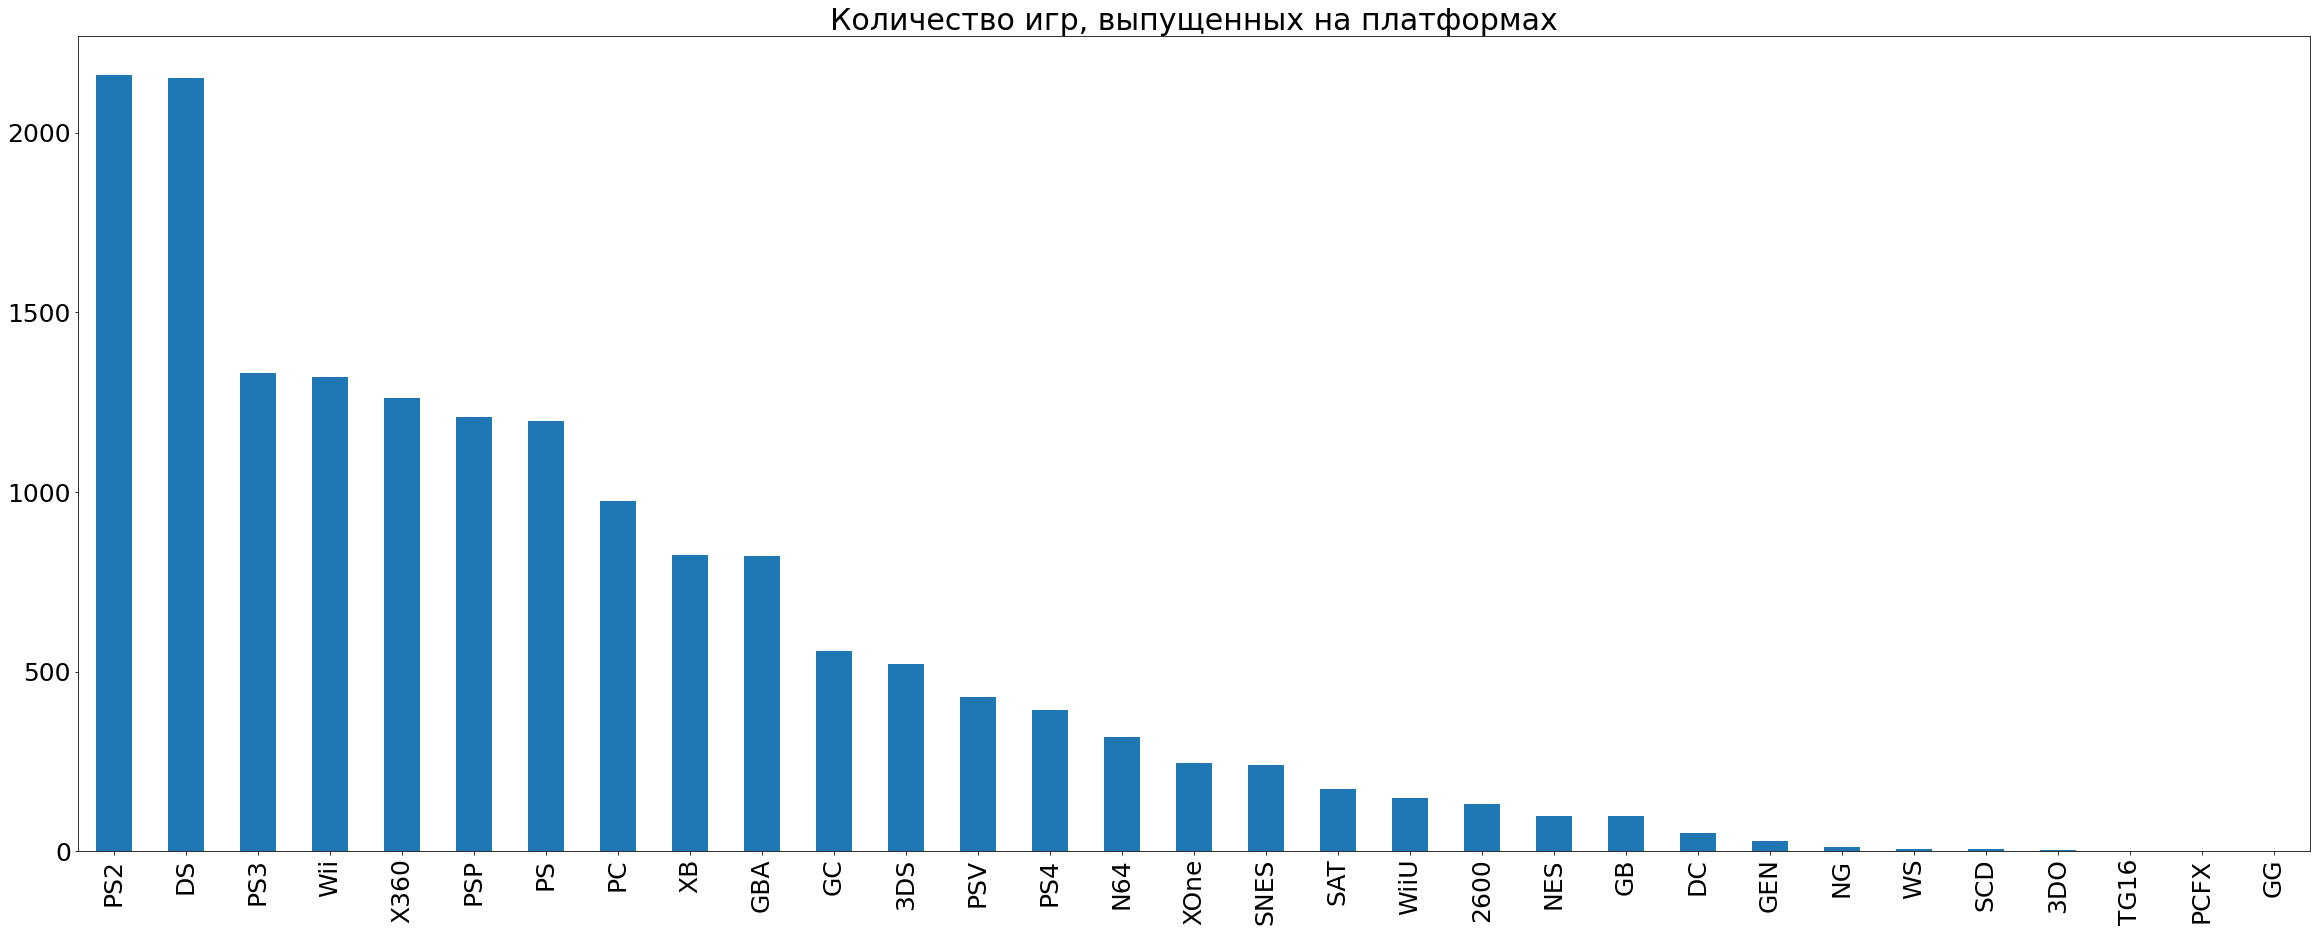

In [7]:
# посмотрим на платформы 

data['Platform'].value_counts().plot(kind = 'bar',figsize=(40,15) , fontsize = 25)
plt.title('Количество игр, выпущенных на платформах', fontsize= 30);

In [8]:
#выведем первые 5 строк с данными, где есть нулевые продажи по каждому региону
data[data['NA_sales']==0].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009.0,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013.0,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995.0,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN


In [9]:
data[data['EU_sales']==0].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
148,Final Fantasy XII,PS2,2006.0,Role-Playing,1.88,0.0,2.33,1.74,92.0,7.6,T
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.0,4.87,0.00,NaN,NaN,NaN
268,Metal Gear Solid 3: Snake Eater,PS2,2004.0,Action,1.46,0.0,0.83,1.93,91.0,9.3,M
284,Half-Life,PC,1997.0,Shooter,4.03,0.0,0.09,0.00,96.0,9.1,M
316,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.0,3.77,0.00,NaN,NaN,NaN


In [10]:
data[data['JP_sales']==0].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.0,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009.0,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T
89,Pac-Man,2600,1982.0,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008.0,Shooter,4.81,1.88,0.0,0.69,84.0,7.6,M
103,Just Dance,Wii,2009.0,Misc,3.48,2.99,0.0,0.73,49.0,8,E10+


In [11]:
data[data['Other_sales']==0].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
138,World of Warcraft,PC,2004.0,Role-Playing,0.08,6.21,0.00,0.0,93.0,7.3,T
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.00,4.87,0.0,NaN,NaN,NaN
284,Half-Life,PC,1997.0,Shooter,4.03,0.00,0.09,0.0,96.0,9.1,M
288,World of Warcraft: The Burning Crusade,PC,2007.0,Role-Playing,2.57,1.52,0.00,0.0,91.0,7.9,T
316,Dragon Warrior III,NES,1988.0,Role-Playing,0.10,0.00,3.77,0.0,NaN,NaN,NaN


**Выводы по шагу 1:**
1. Всего в датафрейме 16 715 записей.
2. Полностью заполнены столбцы: платформа и все столбцы с продажами.
3. Больше всего пропусках в столбцах с оценками и рейтингом.
4. Стоит отметить, что есть две строки, с пропущенным названием игр, возможно, их стоит удалить, т.к. отсутствие название игры делает их неинформативными.
5. Видим, что у столбца User_Score тип данных object, хотя ожидался float, по количеству уникальных значений видим, что в этом столбце очень много значений tbd типа object, их необходимо рассмотреть в ходе предобработки данных.
6. Значение столбца с годом выпуска распределены правдоподобно: до середины 90-х выпускалось крайне мало игр, пик был между 2005 и 2011, дальше некоторый спад.
7. Распределение оценок критиков приближается к нормальному, выбросы отсутствуют.
8. Во всех данных по продажам есть аномалия - очень много нулевых значений, с этим нужно разобраться в ходе предобработки данных. При этом по отображению таблиц с отбором по нулевым продажам по каждому региону можно предположить, что часто игры не продаются во всех регионах стразу. 
9. По графику, показывающем количество игр на разных платформах сразу видны лидеры: PS2 и DS. 

## Предобработка и подготовка данных

In [12]:
# проверим наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют в датафрейме

In [13]:
#Приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [14]:
#посмотрим количество пропусков в столбцах 
pd.DataFrame(round(data.isna().sum(),)).style.background_gradient('coolwarm')

,0
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,6701


In [16]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

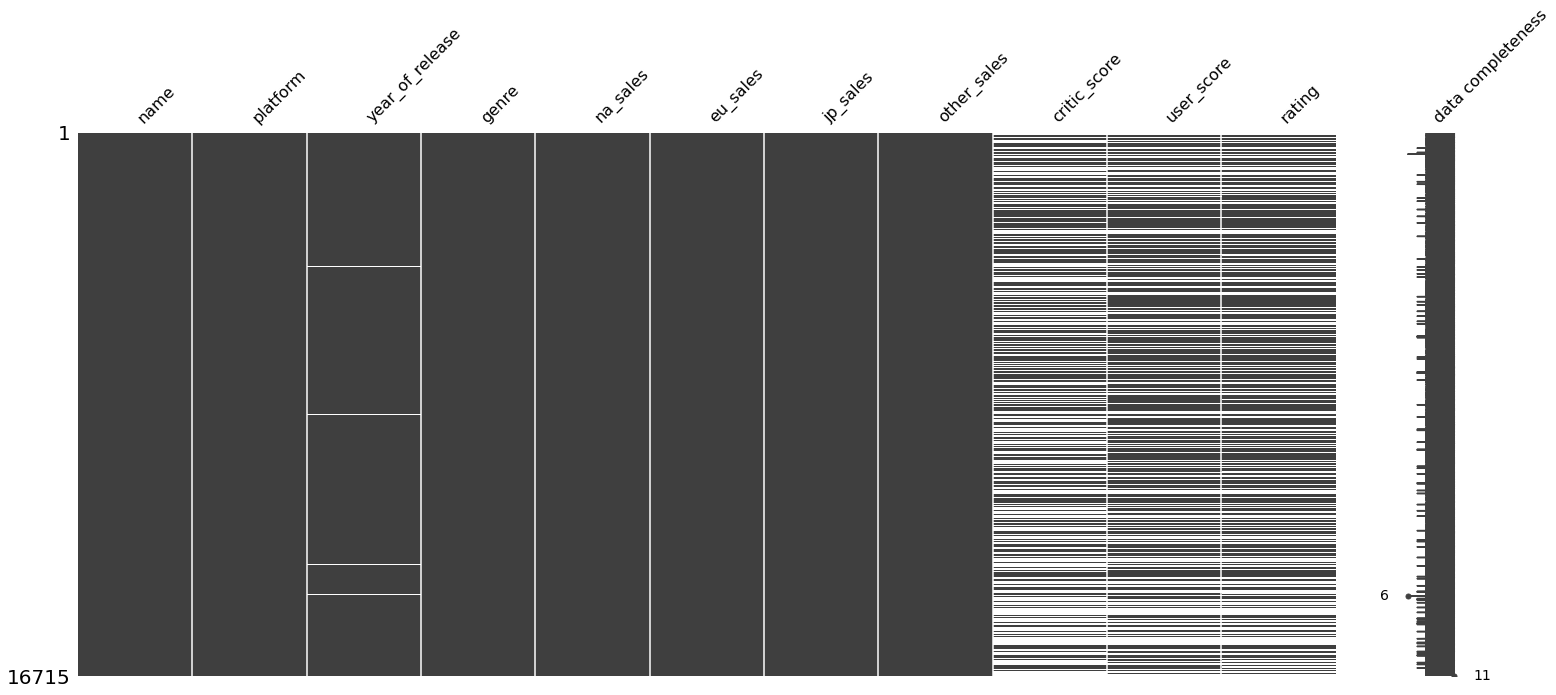

In [17]:
import missingno as msno
msno.matrix(data, labels=True)

Так как название игр и год их выпуска важные для дальнейшего исследования данные и пропуски в данных столбцах делают данные малоинформативными, то удалим строки с пропусками в этих столбцах (предварительно убедившись, что количество таких пропусков мало). Также видно, что есть два пропуска в столбце "Жанр", эти строки также можно удалить, т.к. их количество крайне мало в объеме выборки.

In [18]:
#удалим пропуски в трех столбцах
data = data.dropna(subset = ['name', 'year_of_release',  'genre']).reset_index()

#проверка пропусков после удаления
data.isna().sum()

index                 0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [19]:
#изменим тип лет на целочисленный
data['year_of_release'] = data['year_of_release'].astype('int32')

Обратим внимание на большое количество значений tbd в столбце с оценками пользователей. tbd - to be defined/determined - подлежит определению, т.е. это отсутствующие значения. Однако, они имею тип object, что мешает анализу данных. Т.к. таких значений много (2424 в исходном датасете), то из следует заменить на такое пустое значение, которое не будет мешать обрабатывать данные, т.е. NaN (имеет типо float). Этим же пусты значением предлагается заменить и пустые значения в этом столбце.

In [20]:
#замена пустых строк и tbd  на NaN
data.loc[(data['user_score'] == 'tbd')|(data['user_score'].isna()),'user_score'] = np.nan

In [21]:
# перевод типа 
data['user_score'] = data['user_score'].astype('float')

In [22]:
#проверка
display(data['user_score'].unique())
data['user_score'].dtype


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

dtype('float64')

In [23]:
# пропуски в столбце с рейтингом заменим на "заглушку" unknown
data['rating'] = data['rating'].fillna('unknown')

In [24]:
#проверка 
data['rating'].isna().sum()

0

In [25]:
#добавление столбца с суммарными продажами
data['sum_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [26]:
# проверка пропусков в оценках, для предположения об их возниконовении
data[data['critic_score'].isna()]


,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31
10,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [27]:
data[data['user_score'].isna()]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
5,5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown,30.26
9,9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown,28.31
10,10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,unknown,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [28]:
data[(data['critic_score'].isna()) & (~ data['user_score'].isna())]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
254,255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
262,263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M,4.28
263,264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
290,291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E,4.05
358,359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16365,16636,Deal or No Deal,PC,2006,Misc,0.00,0.01,0.00,0.00,NaN,7.5,E,0.01
16372,16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16383,16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01
16390,16661,Bookworm Deluxe,PC,2006,Puzzle,0.01,0.00,0.00,0.00,NaN,8.0,E,0.01


In [29]:
data[(~data['critic_score'].isna()) & (data['user_score'].isna())]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
182,182,Tomb Raider II,PS,1997,Action,2.30,2.46,0.2,0.28,85.0,NaN,T,5.24
300,301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,NaN,E10+,3.97
438,440,Need for Speed III: Hot Pursuit,PS,1998,Racing,2.14,0.86,0.0,0.13,88.0,NaN,E,3.13
631,637,Riven: The Sequel to Myst,PC,1997,Adventure,1.52,0.82,0.0,0.10,83.0,NaN,E,2.44
639,645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,NaN,E,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16306,16577,Space Raiders,GC,2003,Shooter,0.01,0.00,0.0,0.00,40.0,NaN,T,0.01
16398,16669,Super Robot Taisen: Original Generation,GBA,2002,Role-Playing,0.01,0.00,0.0,0.00,72.0,NaN,T,0.01
16424,16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,NaN,E,0.01
16426,16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,NaN,E,0.01


**Вывод по шагу 2:**
- были удалены строки с пропусками, в тех столбцах, где это не будет иметь сильного влияния на анализ;
- изменен тип данных столбца с годом выпуска для удобства работы со значениями;
- для обеспечения возможности работы с оценками пользователей пропуски и не определенные значения заменены на обрабатываемые пропуски nan;
- т.к. данные об оценках критиков обладают типом float, то их можно не заменять и не заполнять (но и удалять нельзя), их можно будет проанализировать в данном виде;
- пропуски в столбце с рейтингом заменены на "заглушку";
- добавлен столбец с суммарными продажами.

Пропуски в наименовании, жанре и столбце с годом выпуска скорее всего возникли из-за ошибок в заполнении данных.

Пропуски в оценках показывают, что в большинстве случаев одновременно нет оценки критиков и пользователей, хотя встречаются игры для которых нет какой-то одной оценки. 
При обзоре данных явно не просматривается зависимость, почему могли появиться пропуски (разные годы выпуска, платформы, жанры). Можно предположить, что какие-то игры не оценивались, не собирались пользовательские оценки или оценок было слишком мало (например, в таблице с отсутствием только пользовательских оценок видно, что суммарные продажи достаточно низкие) или данные не были загружены в датасет. 



##  Исследоватеьский анализ данных 

### Выпуск игр по годам

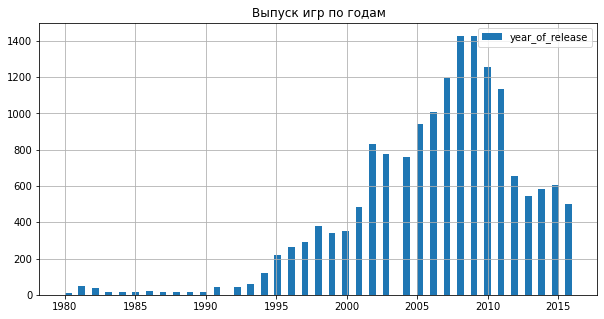

In [30]:
# построекние гистограмы выпуска игр в разные годы
data['year_of_release'].hist(bins=75, legend = True, figsize = (10,5))
plt.title('Выпуск игр по годам');

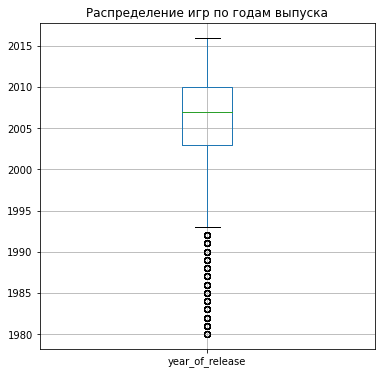

In [31]:
# посмотрим на боксплот, чтобы оценить есть ли выбросы 
data.boxplot('year_of_release', figsize=(6, 6))
plt.title('Распределение игр по годам выпуска');

В распределении видны выбросы. Посмотрим какие годы лежат вне пределов межквартильного размаха.

In [32]:
#определение нижней границы межквартильного размаха
q25 = data['year_of_release'].quantile(0.25) 
q75 = data['year_of_release'].quantile(0.75)
min_year = q25 - 1.5*(q75-q25)
min_year

1992.5

In [33]:
#проверка сколько игр, выпущенных ранее min_year
data[data['year_of_release'] < min_year]['sum_sales'].count()


305

**Вывод по шагу 3.1:** 305 игр выпущено ранее 1992 года, когда их выпускалось мало. Можно предположить, что и их продажи малы, но прежде, чем не учитывать в анализе эти годы, нужно посмотреть, сколько времени "живут" и продаются платформы и соответственно игры на них. 

### Продажи по платформам. Срок "жизни" платформ

#### Изменение продаж по платформам

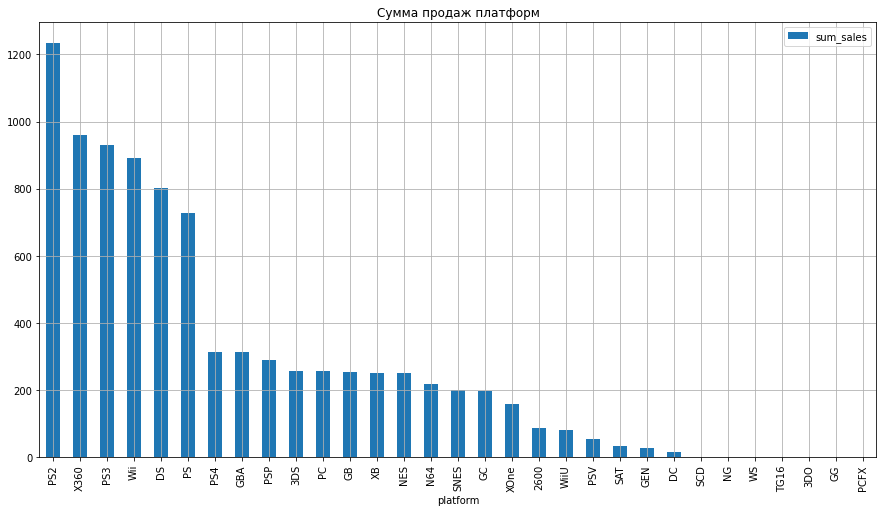

In [34]:
#сводная таблица по платформам и построение графика
data.pivot_table(
    index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False).plot(
    kind = 'bar', figsize = (15, 8), grid = True, title = 'Сумма продаж платформ');

**Вывод:** наиболее продаваемые платформы PS2, X360, PS3, Wii, DS и PS.

#### Продажи платформ по годам

Для рассмотрения продаж по годам возьмем самые продаваемые платформы. Лучше взять больше 6-ти платформ, поэтому добавим и рассмотрим платформы до NES включительно - топ 14 платформ.

In [35]:
# запись top14 платформ по продажам в отдельный датасет
top_14 = data.pivot_table(
    index = 'platform', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False).head(14).reset_index()
top_14

,platform,sum_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


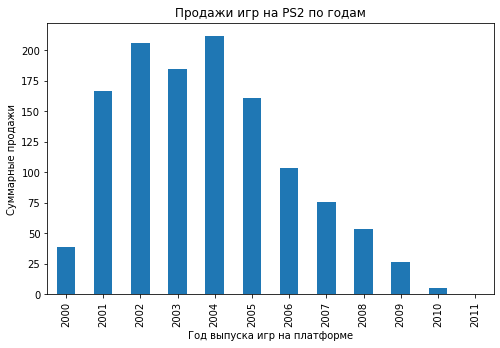

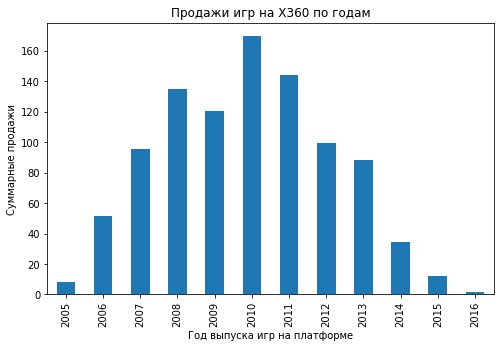

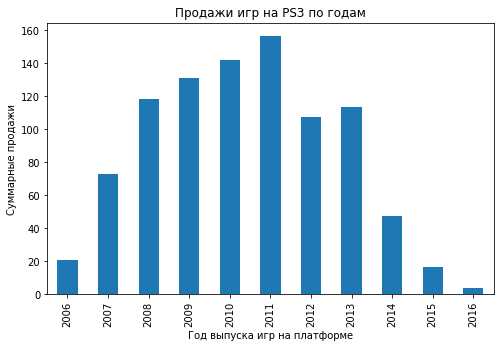

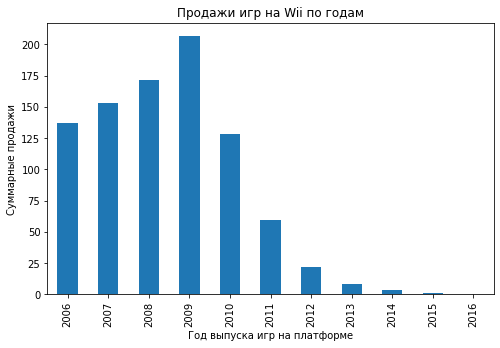

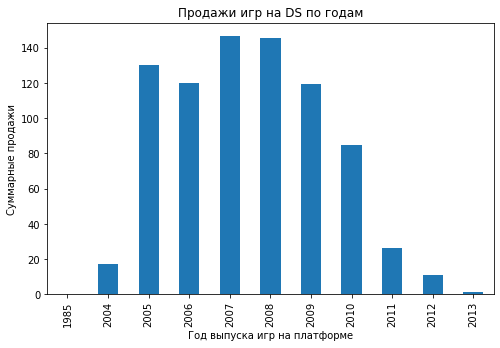

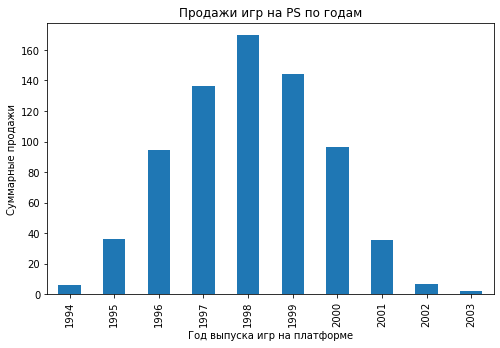

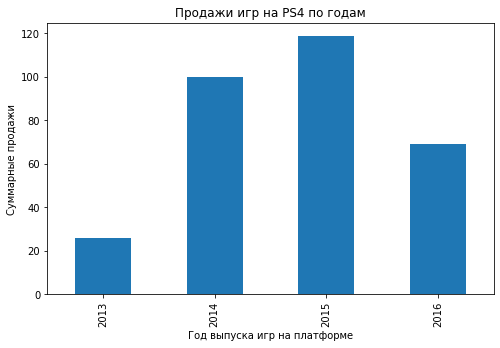

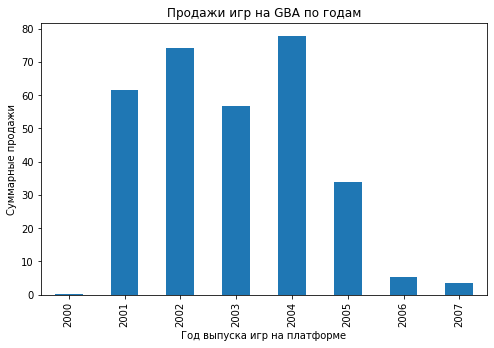

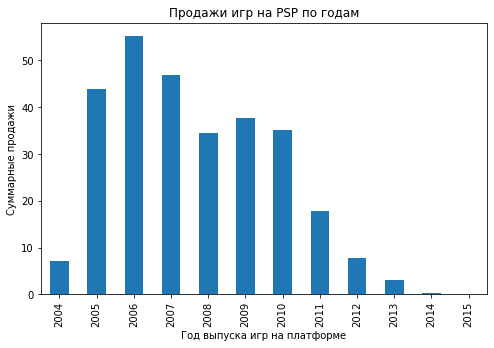

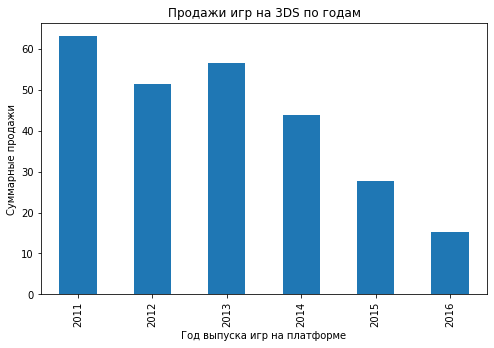

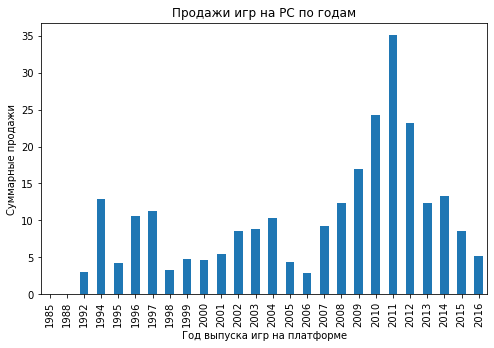

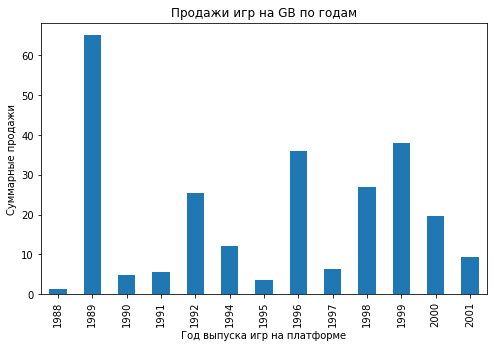

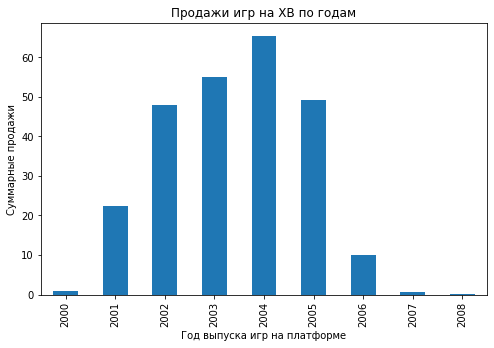

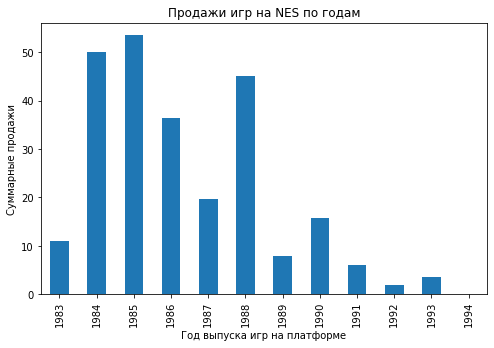

In [36]:
#построение графиков продаж по платформам в зависимости от года выпуска игры
for platform_name in top_14['platform']:
    data[data['platform'] == platform_name].pivot_table(
        index = 'year_of_release', values = 'sum_sales', aggfunc = 'sum').plot(
        kind = 'bar', figsize = (8, 5), ylabel = 'Суммарные продажи',\
        xlabel= 'Год выпуска игр на платформе', legend = False
    )
    plt.title(f'Продажи игр на {platform_name} по годам')
    

**Вывод по шагу 3.2:** 
- платформы живут и выпускают продаваемые игры от 8 до 10 лет;
- есть исключения, как PC, у который были периоды "возрождения" и последний закончился недавно, но у игр, выпущенных в 2016 годы продажи малы; или такие "нестабильные" платформы, как GB или NES, которые уже закончили выпуск игр в 2001 и 1994 годах (что подтверждает предположение из предыдущего пункта 3.1, что старые игры можно не рассматривать в анализе)
- максимума продаж достигают платформы достигаю через 4-6 лет работы;
- через 4-6 лет работы платформ, начинается спад продаж и платформа перестает быть прибыльной/эффективной. 

### Выбор данных за актуальный период

По оценке данных, выполненных в предыдущих пунктах **актуальным периодом**, имеющим перспективы в 2017 году можно назвать последние 4 года, т.е **2013-2016 годы** выпуска игр. Платформы, выпуск игр на которых производился в этот период имеют возможность либо увеличить свои продажи в 2017 году и далее, либо достигнуть пика продаж в 2017 году. 

In [37]:
#сохранение данных за актуалные годы в новом датафрейме
data_actual = data[data['year_of_release'] >= 2013]

In [38]:
# проверка
data_actual['year_of_release'].unique()

array([2013, 2015, 2014, 2016], dtype=int32)

### Выбор потенциально прибыльных платформ

In [39]:
# уникальные значения столбца платформы в актуальные годы
data_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [40]:
#продажи платформ в актуальные годы
potential_platforms = data_actual.pivot_table(
    index = ['platform', 'year_of_release'], values = 'sum_sales', aggfunc = 'sum').reset_index()
potential_platforms

,platform,year_of_release,sum_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
4,DS,2013,1.54
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25


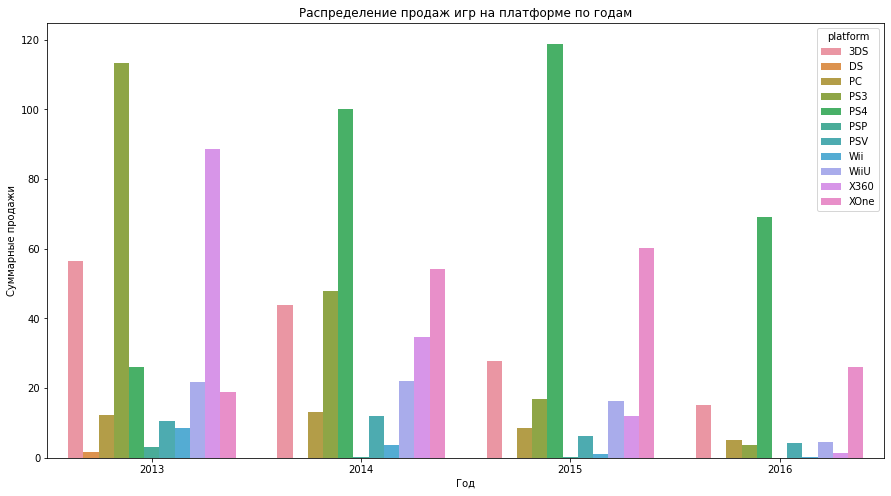

In [41]:
#график по продажам платформ в актульные годы
plt.figure(figsize=(15,8))
ax = sns.barplot(x='year_of_release',
            y='sum_sales',
            hue='platform',
            data=potential_platforms)
            
ax.set_title('Распределение продаж игр на платформе по годам')
ax.set(xlabel='Год', ylabel='Суммарные продажи');

**Вывод по шагу 3.4:**
1. Платформа 3DS: продажи игр на платформе равномерно падают. При этом продажи были достаточно высокие.
2. Платформа DS: продажи были только для игр, выпущенных в 2013 году и низкие. 
3. Платформа PC: продажи немного выросли для игр, выпущенных в 2014 году, а для игр 2015 и 2016 падают. При этом в сравнении с другими платформами продажи достаточно низкие.
4. Платформа PS3: самые высокие продажи игр 2013 года, однако далее игры становились менее популярны, продажи более новых игр сильно ниже и не кажутся перспективными. 
5. Платформа PS4: самые высокие продажи игр 2014, 2015 и 2016 годов, продажи игр растут (за исключением игр 2016 года, но в данном случае можно ссылаться на то, что игры выпущенные в 2016 году в принципе по времени продавались меньше, чем игры 2014 или 2015 года и еще не охватили весь рынок)
6. Платформа PSP: достаточно старая платформа, потерявшая свою популярность, не выпускавшая игры в 2016 году.
7. Платформа PSV: платформа с низкими, падающими продажами.
8. Платформа Wii: платформа, потерявшая свою популярность, с падающими продажами.
9. Платформа WiiU: платформа не вошедшая в топ 14 платформ по продажам и у которой продажи новых игр падают.
10. Платформа X360: на втором месте по продажам в 2014 году, но продажи более новых игр сокращают большими темпами и продажи игр 2016 года одни из самых низких.
11. Платформа XOne: вероятно пришла на смету X360, самые популярные ее игры - игры 2015 года, снижение продаж игр 2016 года можно объяснить также как для платформы PS4.

Таким образом можно предположить, что самыми популярными в 2017 году будут игры, созданные для платформ **PS4** и **XOne**.

### Глобальные продажи игр по платформам

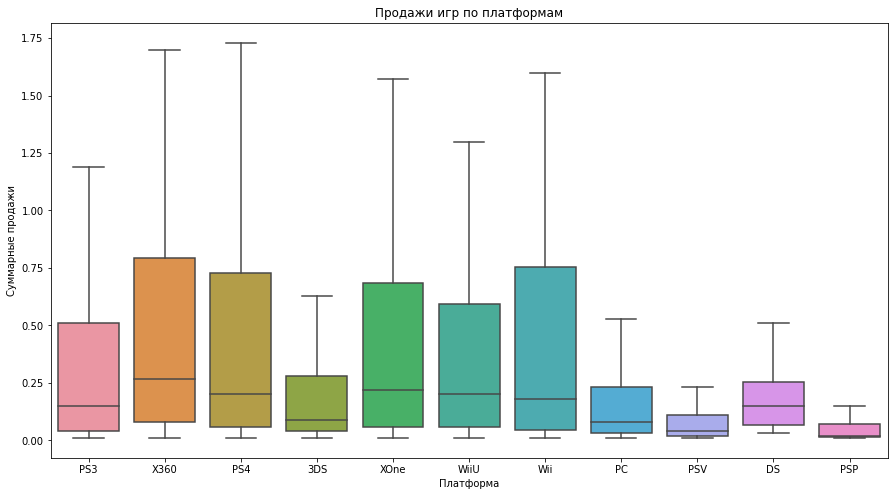

In [42]:
# ящик с усами по глобальным продажам игр в разбивке по платформам
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='platform', y='sum_sales', data=data_actual, showfliers=False)
ax.set_title('Продажи игр по платформам')
ax.set(xlabel='Платформа', ylabel='Суммарные продажи');

**Вывод по шагу 3.5:**
- видно, что распределение продаж для всех платформ смещено влево, т.е. чем выше продажи, тем реже они встречаются;
- медианные значения продаж не превышают 0,25 млн. копий, а 75% продаж лежит в пределах 0.75 млн. копий для всех платформ.
- топ-5 продаваемых платформ (по медианным продажам): X360, PS4, XOne, WiiU и Wii. При этом, как мы уже выделяли выше платформы X360 и Wii приблизились к концу своего существования, а у WiiU в общем датасете низкие продажи. 

Т.е. это подтверждает перспективность PS4 и XOne.

### Влияние отзывов на продажи 

#### На примере X360, самой продаваемой платформы

0.31

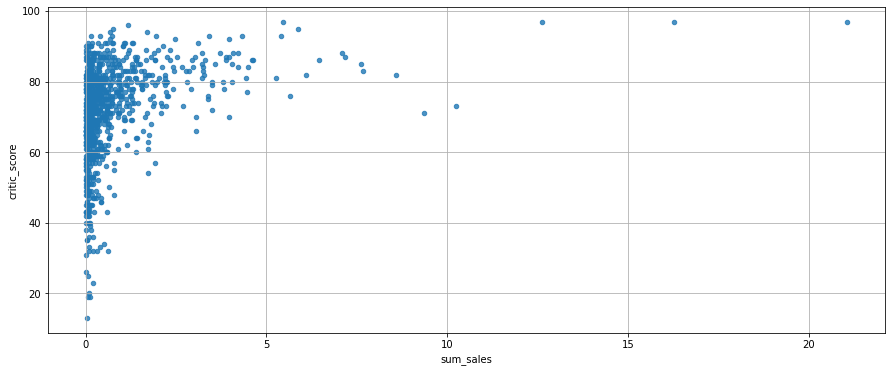

In [43]:
# построение диаграммы рассеяния для зависимости от оценок критиков
data_actual.plot(x='sum_sales', y='critic_score', grid=True, figsize=(15,6),kind='scatter', alpha=0.8);
# коэффициен коррекляции 
data_actual['sum_sales'].corr(data_actual['critic_score']).round(2)

-0.0

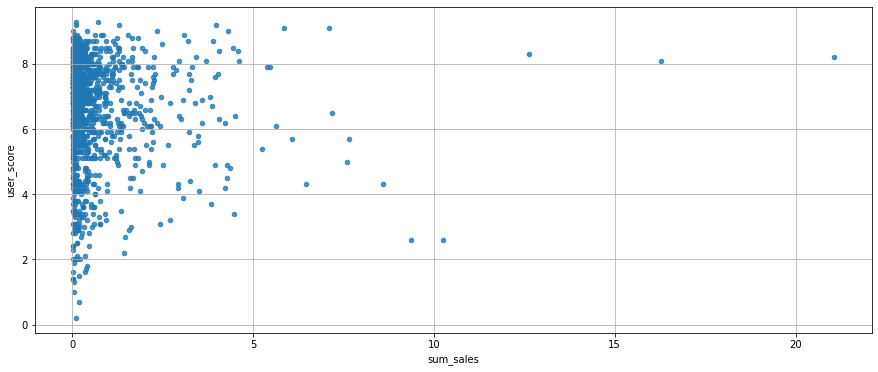

In [44]:
# построение диаграммы рассеяния для зависимости от оценок пользователей
data_actual.plot(x='sum_sales', y='user_score', grid=True, figsize=(15,6),kind='scatter', alpha=0.8);
# коэффициен коррекляции 
data_actual['sum_sales'].corr(data_actual['user_score']).round(2)

**Вывод:** на примере самой продаваемой платформы выявлено отсутствие зависимости между продажами игры и ее оценками критиками и пользователями: зависимость продаж от оценок критиков слабая, от оценок пользователь  отсутствует. 

#### Влияние отзывов на продажи на всех платформах

Коэффициент корреляции для PS3 между продажами и оценками критиков: 0.3342853393371919
Коэффициент корреляции для PS3 между продажами и оценками критиков: 0.0023944027357566925


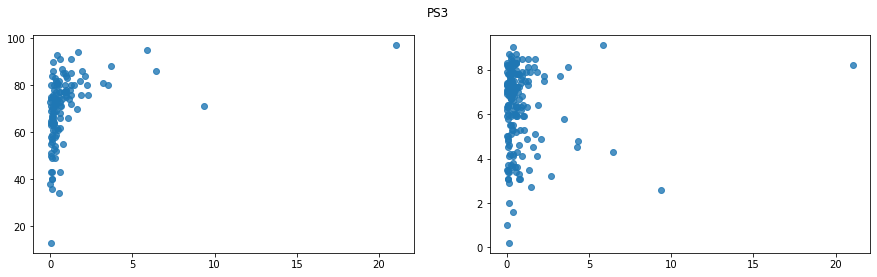

Коэффициент корреляции для X360 между продажами и оценками критиков: 0.3503445460228664
Коэффициент корреляции для X360 между продажами и оценками критиков: -0.011742185147181342


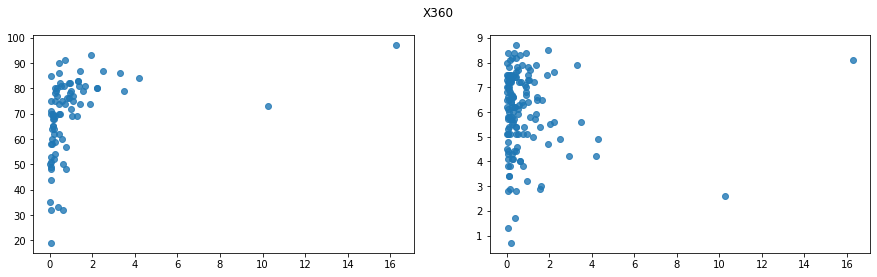

Коэффициент корреляции для PS4 между продажами и оценками критиков: 0.406567902061781
Коэффициент корреляции для PS4 между продажами и оценками критиков: -0.031957110204556376


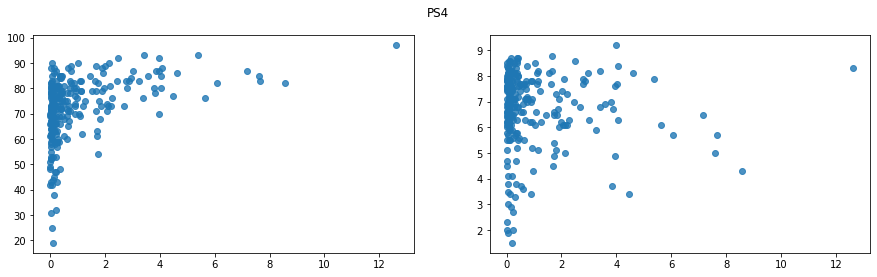

Коэффициент корреляции для 3DS между продажами и оценками критиков: 0.35705661422881035
Коэффициент корреляции для 3DS между продажами и оценками критиков: 0.24150411773563016


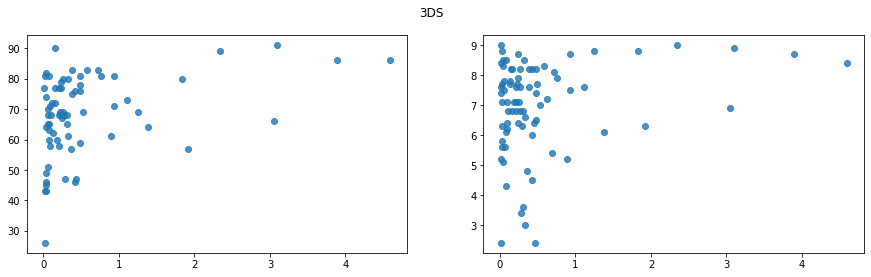

Коэффициент корреляции для XOne между продажами и оценками критиков: 0.41699832800840175
Коэффициент корреляции для XOne между продажами и оценками критиков: -0.06892505328279412


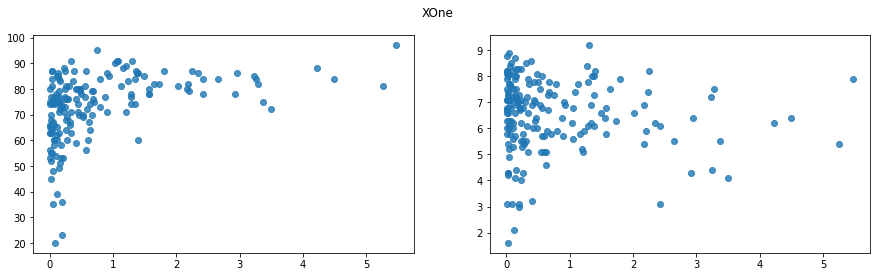

Коэффициент корреляции для WiiU между продажами и оценками критиков: 0.3764149065423912
Коэффициент корреляции для WiiU между продажами и оценками критиков: 0.4193304819266187


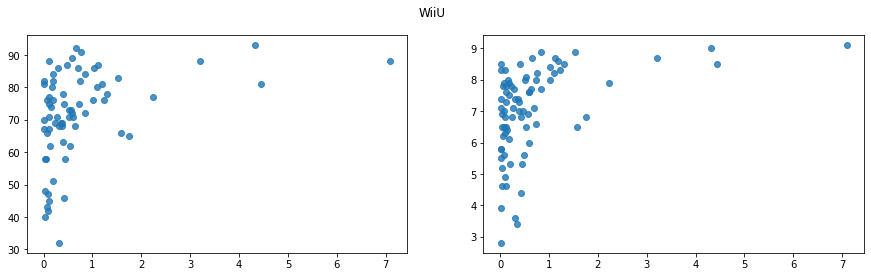

Коэффициент корреляции для Wii между продажами и оценками критиков: nan
Коэффициент корреляции для Wii между продажами и оценками критиков: 0.6829417215362368


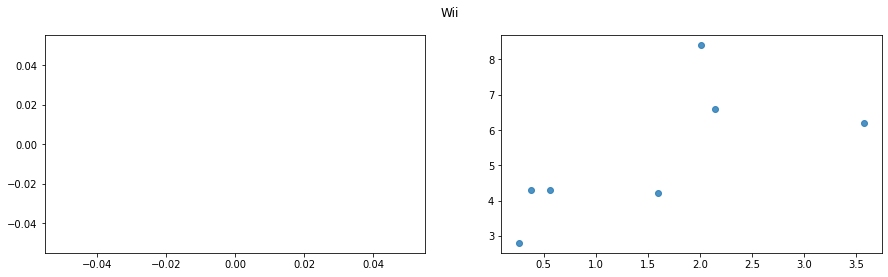

Коэффициент корреляции для PC между продажами и оценками критиков: 0.19603028294369382
Коэффициент корреляции для PC между продажами и оценками критиков: -0.09384186952476739


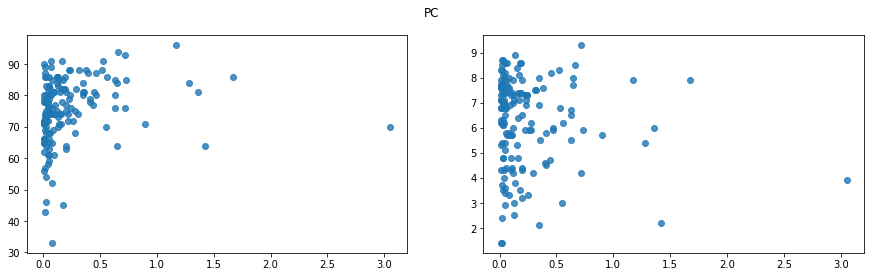

Коэффициент корреляции для PSV между продажами и оценками критиков: 0.25474235030686565
Коэффициент корреляции для PSV между продажами и оценками критиков: 0.0009424723319108626


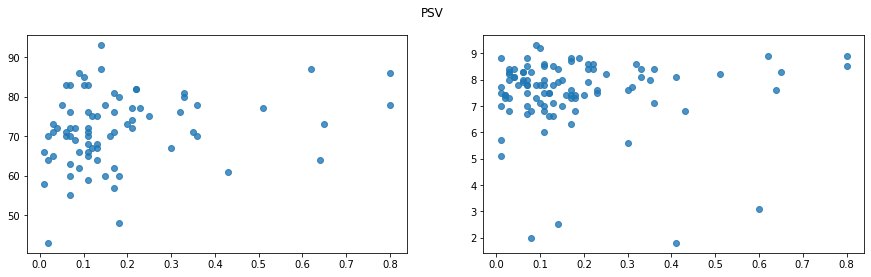

Коэффициент корреляции для DS между продажами и оценками критиков: nan
Коэффициент корреляции для DS между продажами и оценками критиков: nan


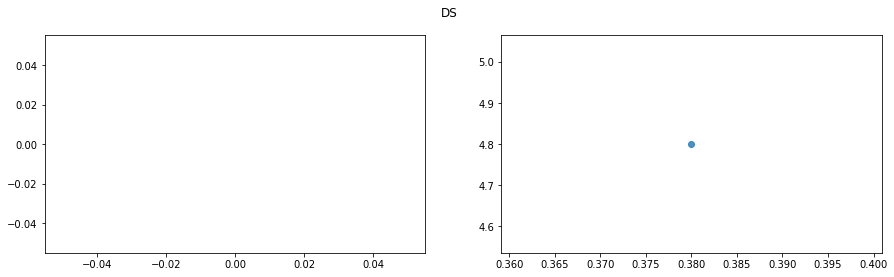

Коэффициент корреляции для PSP между продажами и оценками критиков: nan
Коэффициент корреляции для PSP между продажами и оценками критиков: -0.9999999999999999


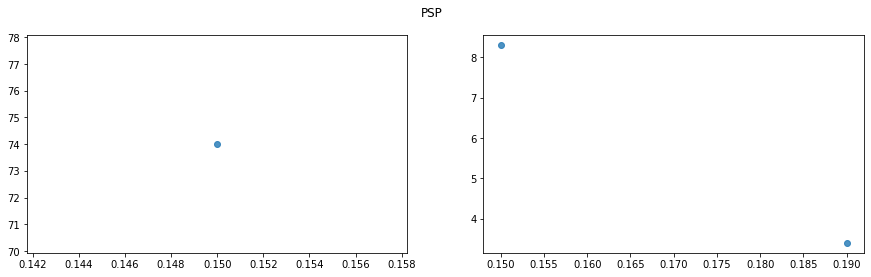

In [45]:
# диаграммы рассеяния и коэффициенты корреляции для все платформ 
import warnings 
warnings.filterwarnings("ignore")
for platform_name in data_actual['platform'].unique():
    # вывод дыух диаграмм в одном общем графике 
    fig = plt.figure(figsize=(15, 4)) 
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #логическая индексация по платформе из набора уникальных, для которых задан цикл
    df = data_actual[data_actual['platform'] == platform_name] 
    #график для в зависимости от ценок критиков
    ax1.scatter(x= df['sum_sales'], y= df['critic_score'],  alpha=0.8);
    #коэффиуие корреляции между продажами и оценками критиков
    corr_critic = df['sum_sales'].corr(data_actual['critic_score'])
    print(f'Коэффициент корреляции для {platform_name} между продажами и оценками критиков: {corr_critic}')
    #график для в зависимости от ценок пользователей
    ax2.scatter(x= df['sum_sales'], y= df['user_score'],  alpha=0.8);
    #коэффиуие корреляции между продажами и оценками пользователей
    corr_user = df['sum_sales'].corr(data_actual['user_score'])
    print(f'Коэффициент корреляции для {platform_name} между продажами и оценками критиков: {corr_user}')
    #название графика - название платформы
    fig.suptitle(platform_name)
    plt.show()
    

**Вывод по шагу 3.6:** коэффициент корреляции между продажами и оценками игр, выпущенных на разных платформах, не превышает 0.4, из чего можно сделать вывод, что оценки слабо влияют на продажи игр. 

### Популярность жанров игр

#### Распределение игр по жанрам

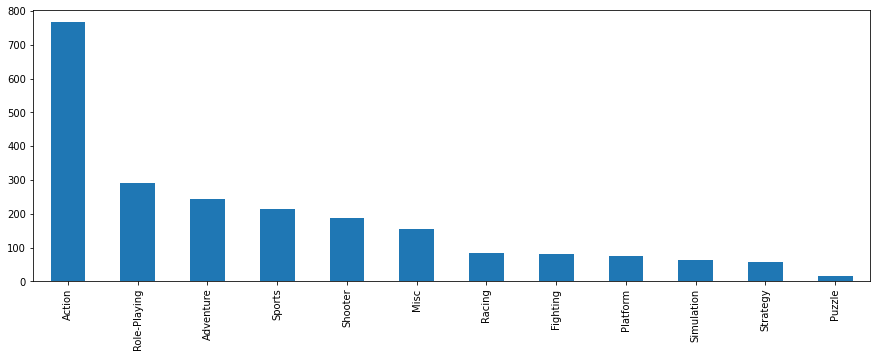

In [46]:
#количество игр в разных жанрах 
data_actual['genre'].value_counts().plot(kind = 'bar', figsize=(15,5));

**Вывод:** больше всего было выпущено игр в жанре Action 

#### Прибыльность жанров

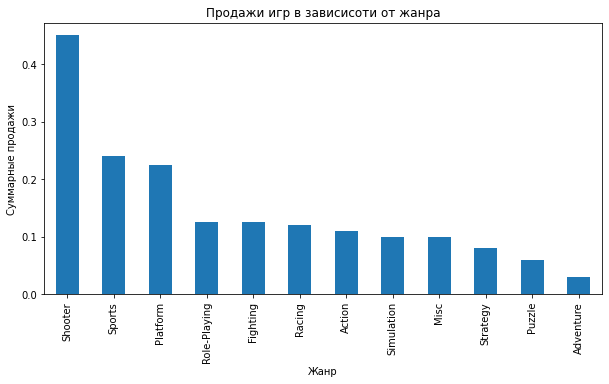

In [47]:
# сводная таблица - продажи жанров и построение графика
data_actual.pivot_table(
    index = 'genre', values = 'sum_sales', aggfunc = 'median').sort_values(by = 'sum_sales',ascending = False).plot(
    kind = 'bar', figsize = (10, 5), ylabel = 'Суммарные продажи',\
    xlabel= 'Жанр', legend = False
    )
plt.title('Продажи игр в зависисоти от жанра');

   
**Вывод**: самым популярным является жанр **Shooter**  . Можно сформировать топ-3 популярных жанров: Shooter, Sports, Platform. Самый не популярный жанр - Adventure.

**Вывод по шагу 3.7:**
1. Больше всего игр было выпущено в жанре action и этот же жанр является самым продаваемым. 
2. Далее продажи не так зависят от количества выпущенных игр. Так второй по продажам жанр на 5м месте по количеству игр, 3-й по продажам - 4ый по количеству, 4-ый по продажам - 2-й по количеству.
4. Можно сформировать топ-4 прибыльных жанров.
3. Самые не популярные игры как по количеству выпущенных так и соответственно по продажам - Puzzle. 

## Портрет пользователя региона

### Регион  Северная Америка

#### Самые популярные платформы

In [48]:
#выбор топ-5 самых популярных платформ в Северной Америке
top5_platforms_na = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).head().reset_index()
top5_platforms_na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


In [49]:
# подсчитаем общий объем продаж всех игр выпущенных в актуальный период в Северной Америке
total_sales_na = data_actual['na_sales'].sum()
print(f'Общий объем продаж всех игр, выпущенных с 2013 по 2016 год в Северной Америке: {total_sales_na} млн. копий')

Общий объем продаж всех игр, выпущенных с 2013 по 2016 год в Северной Америке: 437.71 млн. копий


,platform,na_sales,persent_of_total_sales
4,3DS,38.20,8.727239
3,PS3,63.50,14.507322
2,X360,81.66,18.656188
1,XOne,93.12,21.274360
0,PS4,108.74,24.842933


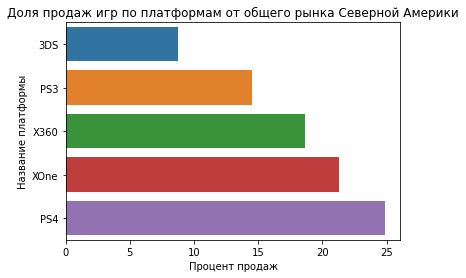

In [50]:
# добавим столбец с долями продаж - процент от общего объема продаж в регионе
top5_platforms_na['persent_of_total_sales'] = top5_platforms_na['na_sales']/total_sales_na*100
top5_platforms_na = top5_platforms_na.sort_values(by = 'persent_of_total_sales')
display(top5_platforms_na)
ax = sns.barplot(x='persent_of_total_sales', y='platform', data = top5_platforms_na)
ax.set_title('Доля продаж игр по платформам от общего рынка Северной Америки')
ax.set(xlabel='Процент продаж', ylabel='Название платформы');

**Вывод:** три самые популярные по продажам платформы занимают почти 65% рынка. За пределами наиболее популярных трех платформ (PS4, XOne, X360) можно наблюдать увеличивающуюся скорость уменьшения доли продаж платформ от общего рынка. 

#### Самые популярные жанры

In [51]:
#выбор топ-5 самых популярных жанров в Северной Америке
top5_genre_na = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'median').sort_values(
    by = 'na_sales', ascending = False).head().reset_index()
#top5_genre_na['persent_of_total_sales'] = top5_genre_na['na_sales']/total_sales_na*100

top5_genre_na

,genre,na_sales
0,Shooter,0.200
1,Platform,0.090
2,Sports,0.080
3,Fighting,0.045
4,Racing,0.030


**Вывод:** 
- самый популярный в Северной Америке жанр игр - **Shooter** 
- на втором месте Platform и немного от него отстает Sports

#### Влияние ESRB на продажи

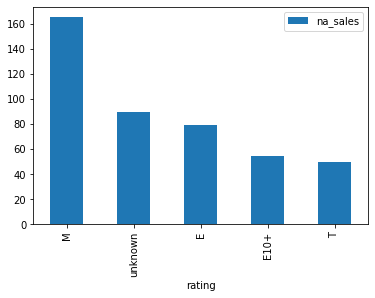

In [53]:
# график зависимости продаж от рейтинга игры
data_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum').sort_values(
    by = 'na_sales', ascending = False).plot(kind = 'bar');

**Вывод:** самыми продаваемыми в Северной Америке являются игры с рейтингом М - для взрослых, 17+. Следующими по популярности (за исключением игр с неизвестным рейтингом) являются игры с рейтингом "Для всех", но объем их продаж уже более, чем в 2 раза ниже, чем продажи игр с рейтингом 17+.

**Вывод по шагу 4.1. Портрет пользователя в Северной Америке:**
пользователь компьютерных игр в Северной Америке предпочитает игры:
- на **PS4** или **XOne** (пользователи также любили X360, но вспомним, что ее популярность заканчивается и ей на смену приходит XOne);
- в жанре **Shooter**;
- с возрастным рейтингом **17+** (для взрослых) 

### Регион Европа

#### Самые популярные платформы

In [54]:
#выбор топ-5 самых популярных платформ в Европе
top5_platforms_eu = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).head().reset_index()
top5_platforms_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [55]:
# подсчитаем общий объем продаж всех игр выпущенных в актуальный период в Европе
total_sales_eu = data_actual['eu_sales'].sum()
print(f'Общий объем продаж всех игр, выпущенных с 2013 по 2016 год в Европе: {total_sales_eu} млн. копий')

Общий объем продаж всех игр, выпущенных с 2013 по 2016 год в Европе: 392.23 млн. копий


,platform,eu_sales,persent_of_total_sales
4,3DS,30.96,7.893328
3,X360,42.52,10.840578
2,XOne,51.59,13.152997
1,PS3,67.81,17.288326
0,PS4,141.09,35.971241


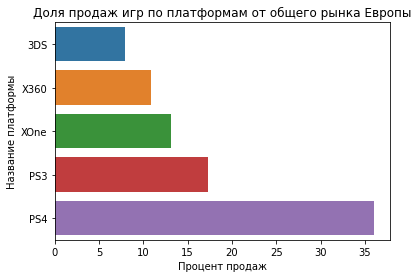

In [56]:
# добавим столбец с долями продаж - процент от общего объема продаж в регионе
top5_platforms_eu['persent_of_total_sales'] = top5_platforms_eu['eu_sales']/total_sales_eu*100
top5_platforms_eu = top5_platforms_eu.sort_values(by = 'persent_of_total_sales')
display(top5_platforms_eu)
ax = sns.barplot(x='persent_of_total_sales', y='platform', data = top5_platforms_eu)
ax.set_title('Доля продаж игр по платформам от общего рынка Европы')
ax.set(xlabel='Процент продаж', ylabel='Название платформы');

**Вывод:** 35% всего рынка Европы занимает платформа PS4. Платформы линейки PS в Европе более популряны, чем линейки XBox (XOne и X360): PS4 и PS3 вмести заняли более 50% рынка, тогда как XBox лишь около 24%.

#### Самые популярные жанры

In [57]:
#выбор топ-5 самых популярных жанров в Европе
top5_genre_eu = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'median').sort_values(
    by = 'eu_sales', ascending = False).head().reset_index()
#top5_genre_eu['persent_of_total_sales'] = top5_genre_eu['eu_sales']/total_sales_eu*100
top5_genre_eu

,genre,eu_sales
0,Shooter,0.190
1,Platform,0.080
2,Racing,0.060
3,Sports,0.050
4,Simulation,0.035


**Вывод:** 
- самый популярный в Европе жанр игр - **Shooter** (чуть менее популярен, чем в Северной Америке) 
- на втором месте Platform (аналогично Северной Америке)
- на третьем - Racing 

#### Влияние ESRB на продажи

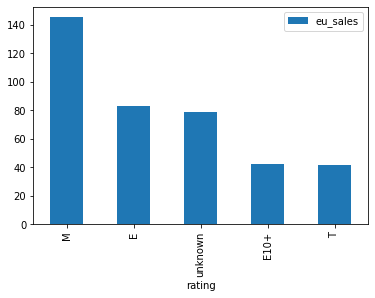

In [58]:
# график зависимости продаж от рейтинга игры
data_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum').sort_values(
    by = 'eu_sales', ascending = False).plot(kind = 'bar');

**Вывод:** самыми продаваемыми в Европе являются игры с рейтингом М - для взрослых, 17+. Следующими по популярности являются игры с рейтингом "Для всех", но объем их продаж значительно ниже, чем объем продаж игр 17+.

**Вывод по шагу 4.2. Портрет пользователя в Европе:**
пользователь компьютерных игр в Европе предпочитает игры:
- на **PS4** или PS3 (однако нужно помнить что ее популярность заканчивается);
- в жанре **Shooter** ;
- с возрастным рейтингом **17+** (для взрослых) или с рейтингом **для всех** 

### Регион Япония

#### Самые популярные платформы

In [59]:
#выбор топ-5 самых популярных платформ в Японии
top5_platforms_jp = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).head().reset_index()
top5_platforms_jp

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


In [60]:
# подсчитаем общий объем продаж всех игр выпущенных в актуальный период в Японии
total_sales_jp = data_actual['jp_sales'].sum().round(2)
print(f'Общий объем продаж всех игр, выпущенных с 2013 по 2016 год в Японии: {total_sales_jp} млн. копий')

Общий объем продаж всех игр, выпущенных с 2013 по 2016 год в Японии: 140.78 млн. копий


,platform,jp_sales,persent_of_total_sales
4,WiiU,10.88,7.728371
3,PS4,15.96,11.336838
2,PSV,18.59,13.205001
1,PS3,23.35,16.586163
0,3DS,67.81,48.167353


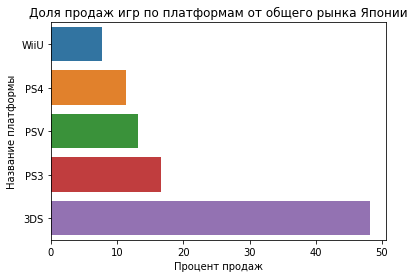

In [61]:
# добавим столбец с долями продаж - процент от общего объема продаж в регионе
top5_platforms_jp['persent_of_total_sales'] = top5_platforms_jp['jp_sales']/total_sales_jp*100
top5_platforms_jp = top5_platforms_jp.sort_values(by = 'persent_of_total_sales')
display(top5_platforms_jp)
ax = sns.barplot(x='persent_of_total_sales', y='platform', data = top5_platforms_jp)
ax.set_title('Доля продаж игр по платформам от общего рынка Японии')
ax.set(xlabel='Процент продаж', ylabel='Название платформы');

**Вывод:** 48% всего рынка Японии занимает платформа 3DS, несмотря на то, что по предыдущим оценкам, казалось, что ее период жизни заканчивается. Более новые платформы находят популярности на рынки Японии.

#### Самые популярные жанры

In [62]:
#выбор топ-5 самых популярных жанров в Японии
top5_genre_jp = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'median').sort_values(
    by = 'jp_sales', ascending = False).head().reset_index()
#top5_genre_jp['persent_of_total_sales'] = top5_genre_jp['jp_sales']/total_sales_jp*100
top5_genre_jp

,genre,jp_sales
0,Role-Playing,0.05
1,Fighting,0.03
2,Misc,0.02
3,Puzzle,0.02
4,Action,0.01


**Вывод:** 
- самый популярный в Японии жанр игр - Role-Playing
- менее популярны игры в жанре Fighting

#### Влияние ESRB на продажи

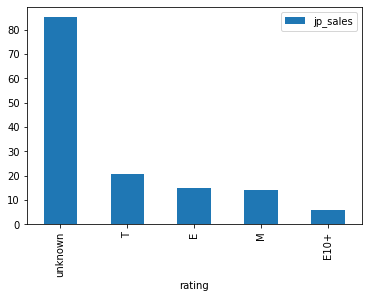

In [63]:
# график зависимости продаж от рейтинга игры
data_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum').sort_values(
    by = 'jp_sales', ascending = False).plot(kind = 'bar');

**Вывод:** в Японии большинство игр без определенного рейтинга (возможно игры для рынка Японии просто редко оцениваются, т.к. основное направление ESRB - это оценка ПО в США и Канаде). Для оцененных игр не наблюдается большой разницы в продаже игр с разным рейтингом, но отметим, что больше всего продаж у игр с рейтингом "для подростков", а меньше всего - "Для всех от 10 лет и старше"

**Вывод по шагу 4.3. Портрет пользователя в Японии:**
Портрет пользователя в Японии значительно отличается по портрета пользователя в Северной Америке и Европе.
Пользователь компьютерных игр в Японии предпочитает игры:
- на **3DS** (консервативный выбор платформы, которая вовсе не попадала в рейтинги для других регионов);
- в жанре **Role-Playing** ;
- возрастной рейтинг практически **не влияет** на продажи игр в Японии.

##  Проверка гипотез

### Гипотеза о пользовательских рейтингах платформ

**Гипотеза:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H_0**: Средний пользовательский рейтинг (user_score) платформы XOne = Средний пользовательский рейтинг (user_score) платформы PC

**H_1**: Средний пользовательский рейтинг (user_score) платформы XOne ≠ Средний пользовательский рейтинг (user_score) платформы PC

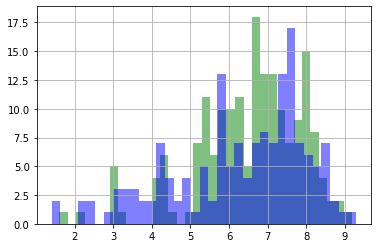

In [64]:
# посмотрим на вид распределений
data_actual[data_actual['platform'] =='XOne']['user_score'].hist(bins=35, alpha=0.5, color='green')
data_actual[data_actual['platform'] =='PC']['user_score'].hist(bins=35, alpha=0.5, color='blue');

In [65]:
# вызов метода для проверки гипотезы о равенстве средних в независимых выборках
# считаем дисперсии двух выборок равными
results = st.ttest_ind(
    data_actual[data_actual['platform'] =='XOne']['user_score'].dropna(), 
    data_actual[data_actual['platform'] =='PC']['user_score'].dropna()
)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


**Вывод по шагу 5.1.:** гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны не может быть отвергнуты. 

### Гипотеза о пользовательских рейтингах жанров

**Гипотеза:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**H_0**: Средний пользовательский рейтинг (user_score) жара Action = Средний пользовательский рейтинг (user_score) жанра Sports

**H_1**: Средний пользовательский рейтинг (user_score) жара Action ≠ Средний пользовательский рейтинг (user_score) жанра Sports

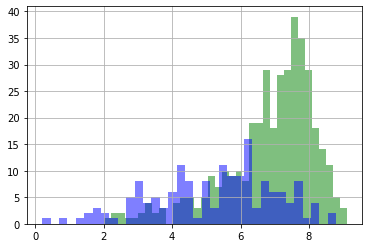

In [66]:
# посмотрим на вид распределений
data_actual[data_actual['genre'] =='Action']['user_score'].hist(bins=35, alpha=0.5, color='green')
data_actual[data_actual['genre'] =='Sports']['user_score'].hist(bins=35, alpha=0.5, color='blue');

In [67]:
# вызов метода для проверки гипотезы о равенстве средних в независимых выборках
results = st.ttest_ind(
    data_actual[data_actual['genre'] =='Action']['user_score'].dropna(), 
    data_actual[data_actual['genre'] =='Sports']['user_score'].dropna(),
    equal_var=False # считаем дисперсии двух выборок не равными
)
# значение уровня значимости
alpha = 0.05
# вывод значения p-value 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод по шагу 5.2.:** гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы, отвергается, т.е гипотеза о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные, не может быть отвергнута.

## Общие выводы

**В ходе исследования были выполнены следующие основные этапы:**
1. Предварительный анализ данных:
- основная информация о данных
- наличие пропусков
- наличие выбросов
- формы распределений данных
- причины возникновения пропусков
2. Предобработка данных:
- приведение названий столбцов к нижнему регистру
- изменение типа данных, на подходящие для дальнейшей обработки
- обработка пропусков и неизвестных значений и замена их на формы, позволяющие обработку
- добавление дополнительного столбца с суммарным продажами для проведения дальнейшего анализа
3. Исследовательский анализ данных:
- определен актуальный период, в который выпускаются игры для перспективных платформ: для анализа следует использовать игры с **годом выпуска с 2013 по 2016 годы**.
- выбраны потенциально прибыльные платформы: **PS4** и **XOne**
- определено, что оценки пользователей и критиков не влияют на продажи игр
- определен самый популярный жанр: **Shooter**
4. Составлены портреты пользователей для:
- Северной Америки
- Европы
- Японии
5. Проверены гипотезы и выявлено, что:
- гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC **одинаковые** отклонить **нельзя**
- гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports **разные** отклонить также **нельзя**

**Рекомендации для рекламной кампании в 2017 году:**
1. Рекламные кампании лучше проводить разные в зависимости от **региона продаж**:
- для Северной Америки и Европы кампании можно объединить
- для Японии требуется отдельная рекламная кампания
2. **Платформы**, на которых стоит сосредоточиться:
- для Северной Америки и Европа: PS4 И XOne. При этом стоит помнить, что в Европе предпочитают PS, но можно попробовать продвигать и XBox и при этом помнить о том, что здесь эффективность кампании может быть ниже
- для Японии: несмотря на общую непопулярность, в Японии более популярна 3DS. Можно предположить две стратегии: продолжать продвигать эту платформу и надеяться на ее второй "пик" продаж, или попробовать продвигать PS4, которая несмотря на низкий уровень продаж в Японии все же попала в топ-5 по продажам и в мировом масштабе обладает куда большими перспективми развития
3. Наиболее популярные **жанры**:
- для Северной Америки и Европы: наиболее популярный жанр это , также можно продвигать и Platform
- для Японии: наиболее популярный и перспективный жанр Role-Playing
4. **Возраст** целевой аудитории рекламной кампании.
    
    По оценке возрастного рейтинга можно предположить то, что целевой аудиторией являются:
- в Северной Америке и Европе: взрослые пользователи старше 17 лет
- в Японии: подростки

    При этом нужно помнить, что большинство игр в Японии не имеет возрастного рейтинга, а в Северной Америке и Европе игры без рейтинга занимают по продажам 2ое и 3е место, так что возрастной рейтинг не следует принимать за ключевой фактор, влияющий на рекламную кампанию

